<a href="https://colab.research.google.com/github/kiran-pyt/Pytorch-Parctise/blob/main/Pytorch_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.optim import SGD
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
import random

# Generate random 2D list for x
x = [[random.randint(1, 10) for _ in range(2)] for _ in range(100)]

# Generate random 2D list for y
y = [[random.randint(1, 20)] for _ in range(100)]

print("Random x:", x)
print("Random y:", y)



Random x: [[9, 2], [8, 4], [8, 2], [6, 4], [5, 1], [2, 7], [6, 2], [10, 9], [5, 2], [2, 3], [10, 7], [1, 5], [3, 8], [2, 10], [8, 7], [10, 10], [2, 10], [7, 2], [10, 7], [7, 4], [2, 3], [10, 1], [3, 6], [1, 10], [10, 2], [9, 5], [3, 2], [8, 2], [6, 9], [1, 3], [2, 8], [9, 7], [6, 4], [10, 3], [5, 3], [8, 2], [2, 5], [6, 6], [8, 7], [8, 4], [3, 5], [10, 1], [9, 5], [9, 2], [3, 6], [8, 1], [10, 3], [1, 9], [5, 3], [7, 4], [4, 3], [7, 2], [9, 7], [8, 9], [1, 1], [3, 7], [10, 9], [2, 3], [8, 6], [6, 4], [6, 9], [3, 5], [1, 8], [5, 3], [6, 6], [6, 9], [6, 9], [5, 7], [3, 5], [1, 2], [4, 5], [4, 9], [5, 3], [6, 3], [8, 9], [1, 2], [2, 8], [9, 6], [3, 4], [5, 9], [2, 5], [5, 5], [5, 2], [5, 1], [5, 1], [6, 6], [3, 2], [10, 9], [9, 9], [7, 5], [2, 1], [6, 5], [6, 3], [9, 9], [1, 2], [7, 9], [6, 3], [4, 10], [5, 9], [10, 10]]
Random y: [[2], [5], [5], [1], [9], [13], [20], [18], [5], [16], [13], [20], [14], [12], [12], [12], [2], [13], [19], [6], [11], [13], [19], [7], [15], [5], [18], [3], [1]

In [23]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
  def __len__(self):
    return len(self.x)
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [24]:
ds=MyDataset(x,y)

In [25]:
dl=DataLoader(ds, batch_size=2, shuffle=True)

In [26]:
# Example usage: Iterating through the DataLoader
for batch_idx, (features, targets) in enumerate(dl):
    print(f"Batch {batch_idx + 1}")
    print("Features:", features)
    print("Targets:", targets)

Batch 1
Features: tensor([[ 2.,  8.],
        [10., 10.]])
Targets: tensor([[ 2.],
        [12.]])
Batch 2
Features: tensor([[5., 2.],
        [3., 5.]])
Targets: tensor([[5.],
        [9.]])
Batch 3
Features: tensor([[ 8.,  1.],
        [10.,  7.]])
Targets: tensor([[20.],
        [19.]])
Batch 4
Features: tensor([[3., 8.],
        [1., 5.]])
Targets: tensor([[14.],
        [20.]])
Batch 5
Features: tensor([[9., 5.],
        [6., 3.]])
Targets: tensor([[ 5.],
        [10.]])
Batch 6
Features: tensor([[9., 9.],
        [1., 2.]])
Targets: tensor([[1.],
        [1.]])
Batch 7
Features: tensor([[ 8.,  7.],
        [10.,  3.]])
Targets: tensor([[12.],
        [ 6.]])
Batch 8
Features: tensor([[3., 2.],
        [3., 6.]])
Targets: tensor([[11.],
        [ 3.]])
Batch 9
Features: tensor([[10.,  7.],
        [ 2.,  1.]])
Targets: tensor([[13.],
        [13.]])
Batch 10
Features: tensor([[5., 7.],
        [7., 4.]])
Targets: tensor([[ 8.],
        [15.]])
Batch 11
Features: tensor([[6., 2.],


In [27]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):#def __init__(self,input_size,output_size)
        super(MyNeuralNetwork,self).__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)
    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x


In [28]:
mynet=MyNeuralNetwork().to(device)
loss_func=nn.MSELoss()
optimizer=SGD(mynet.parameters(), lr=0.001)

In [29]:
loss_history=[]
for _ in range(50):
  for data in dl:
    x,y=data
    optimizer.zero_grad()
    loss_value=loss_func(mynet(x),y)
    loss_value.backward()
    optimizer.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

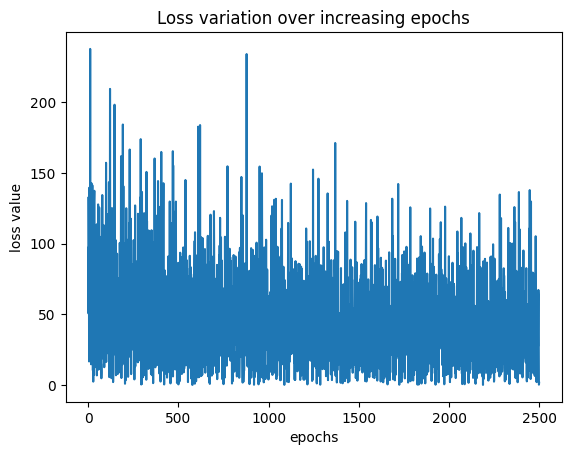

In [30]:
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')